In [1]:
import pandas as pd

data = pd.read_csv("Disaster_Tweets_train.csv")

data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [2]:
# Calculate the number of null values in each column
null_counts = data.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_counts / len(data)) * 100

# Combine counts and percentages into a DataFrame
null_counts_df = pd.DataFrame({
    'NullCount': null_counts,
    'Percentage': null_percentage
}, index=null_counts.index)

null_counts_df

,NullCount,Percentage
id,0,0.000000
keyword,61,0.801261
location,2534,33.285170
text,0,0.000000
target,0,0.000000


Null values in each column:
id             0
keyword       61
location    2534
text           0
target         0
dtype: int64


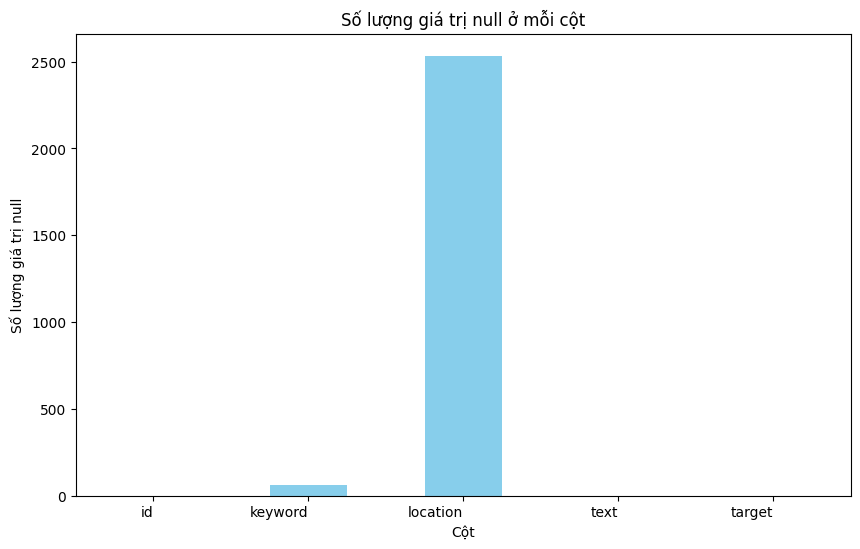

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the number of null values in each column
null_counts = data.isnull().sum()

# Print the count of null values
print("Null values in each column:")
print(null_counts)

# Plot the count of null values
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng giá trị null ở mỗi cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị null')
plt.xticks(rotation=0, ha='right')
plt.show()

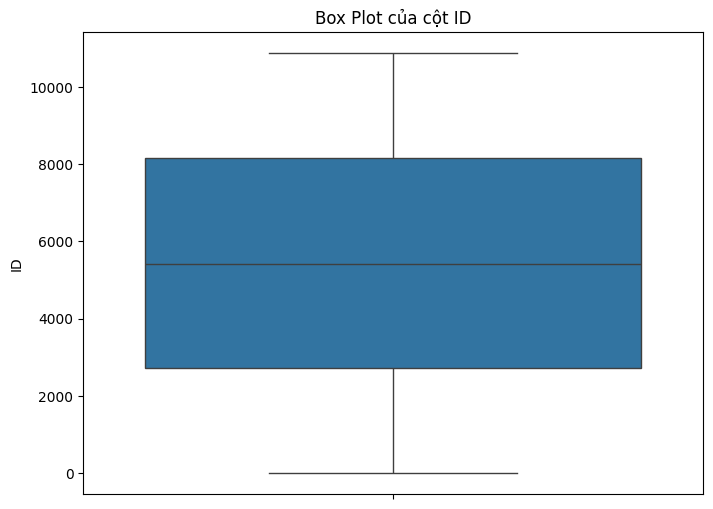

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total count of values in the 'id' column
total_count = len(data['id'])

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['id'])

# Add title and labels
plt.title('Box Plot của cột ID')
plt.ylabel('ID')
plt.show()

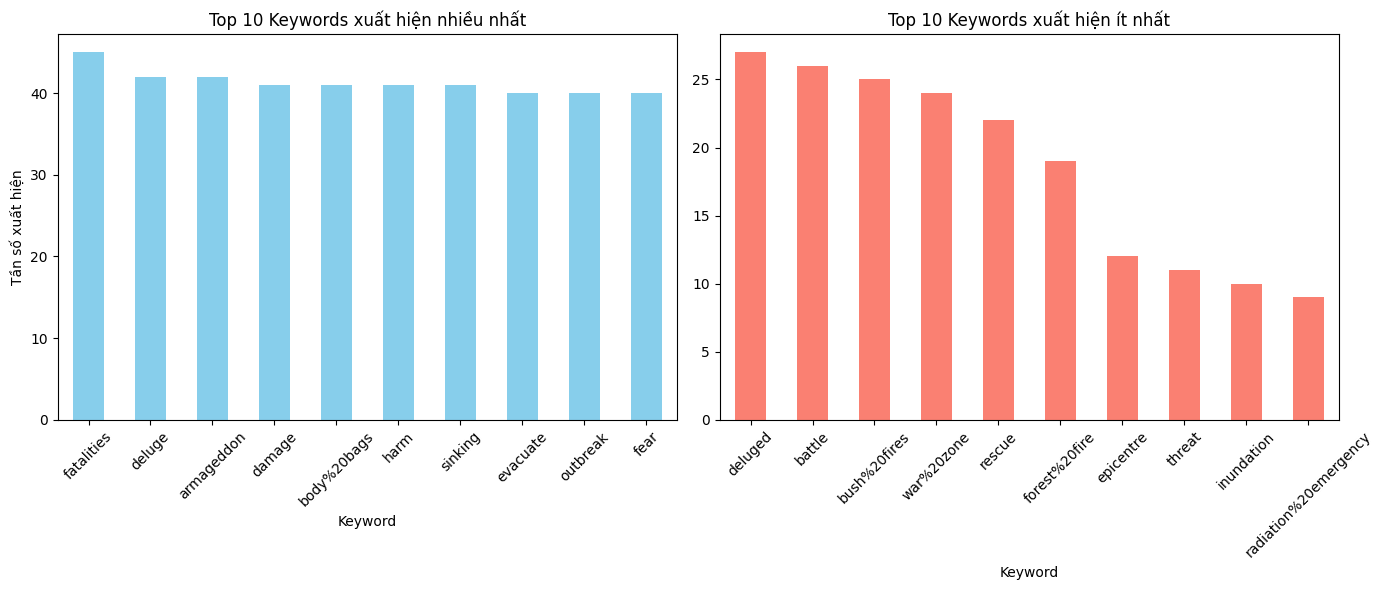

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

keyword_counts = data['keyword'].value_counts()


top_10_keywords = keyword_counts.head(10)
least_10_keywords = keyword_counts.tail(10)

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 10 keywords on the first subplot
top_10_keywords.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title("Top 10 Keywords xuất hiện nhiều nhất")
ax1.set_xlabel("Keyword")
ax1.set_ylabel("Tần số xuất hiện")
ax1.tick_params(axis='x', rotation=45)

# Plot the least 10 keywords on the second subplot
least_10_keywords.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title("Top 10 Keywords xuất hiện ít nhất")
ax2.set_xlabel("Keyword")
ax2.tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

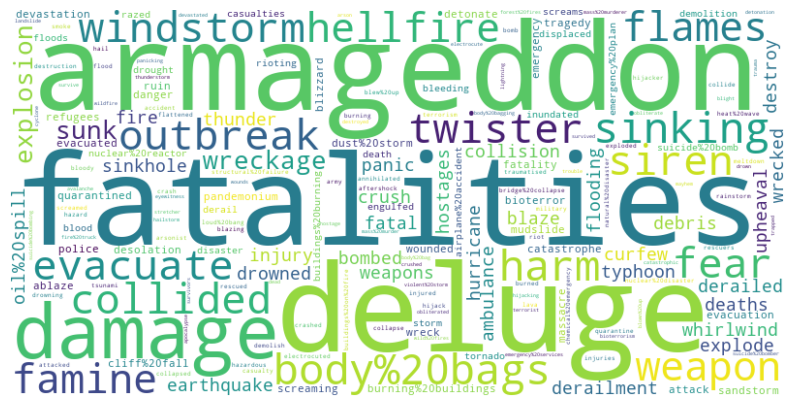

In [6]:
# Word Cloud visualization
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
unique_keywords = data['keyword'].nunique()
print(f"Tổng số lượng keywords khác nhau: {unique_keywords}")

Tổng số lượng keywords khác nhau: 221


In [24]:
missing_keyword_count = data['text'].isnull().sum()
print(f"Số lượng tweet không có keyword: {missing_keyword_count}")

Số lượng tweet không có keyword: 0


In [25]:
missing_keyword_count = data['text'].isnull().sum()
print(f"Số lượng tweet không có location: {missing_keyword_count}, chiếm {missing_keyword_count / len(data) * 100}%")

Số lượng tweet không có location: 0, chiếm 0.0%


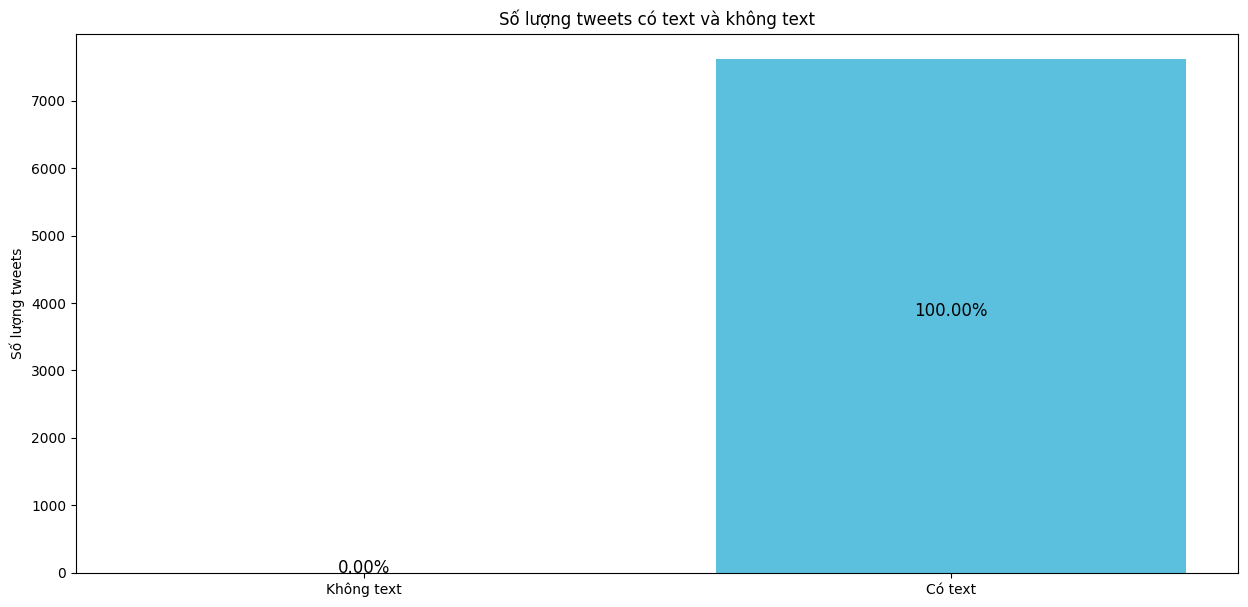

In [31]:
import matplotlib.pyplot as plt

# Calculate missing and non-missing counts
missing_keyword_count = data['text'].isnull().sum()
non_missing_keyword_count = len(data) - missing_keyword_count

# Calculate percentages
missing_percentage = missing_keyword_count / len(data) * 100
non_missing_percentage = non_missing_keyword_count / len(data) * 100

# Prepare labels and values for the plot
labels = ['Không text', 'Có text']
values = [missing_keyword_count, non_missing_keyword_count]

# Plot
plt.figure(figsize=(15, 7))
# Blue and orange colors for contrast
bars = plt.bar(labels, values, color=['#d9534f', '#5bc0de'])
plt.title('Số lượng tweets có text và không text')
plt.ylabel('Số lượng tweets')

# Display percentages on the bars
plt.text(0, missing_keyword_count / 2,
         f"{missing_percentage:.2f}%", ha='center', color='black', fontsize=12)
plt.text(1, non_missing_keyword_count / 2,
         f"{non_missing_percentage:.2f}%", ha='center', color='black', fontsize=12)

plt.show()

In [33]:
data['text'].loc[5:10]

5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
Name: text, dtype: object

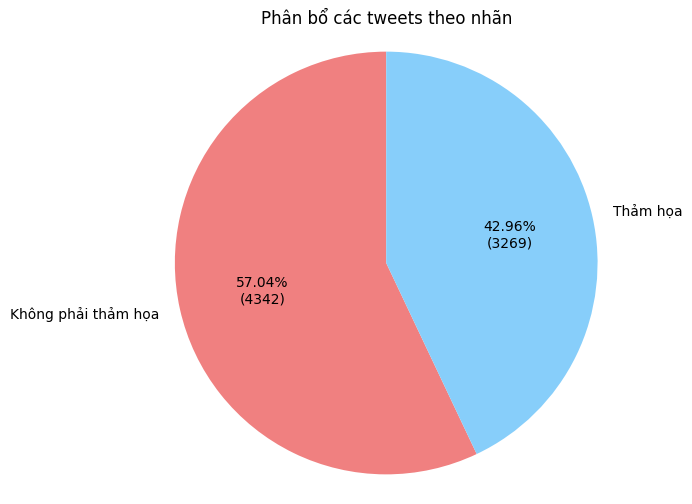

In [38]:
count = data['target'].value_counts()

# Labels for the pie chart
labels = ['Không phải thảm họa', 'Thảm họa']
counts = [count.get(0, 0), count.get(1, 0)]  # Get counts for 0 and 1

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct=lambda p: f'{p:.2f}%\n({int(p / 100 * sum(counts))})',
        startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Phân bổ các tweets theo nhãn')
plt.show()

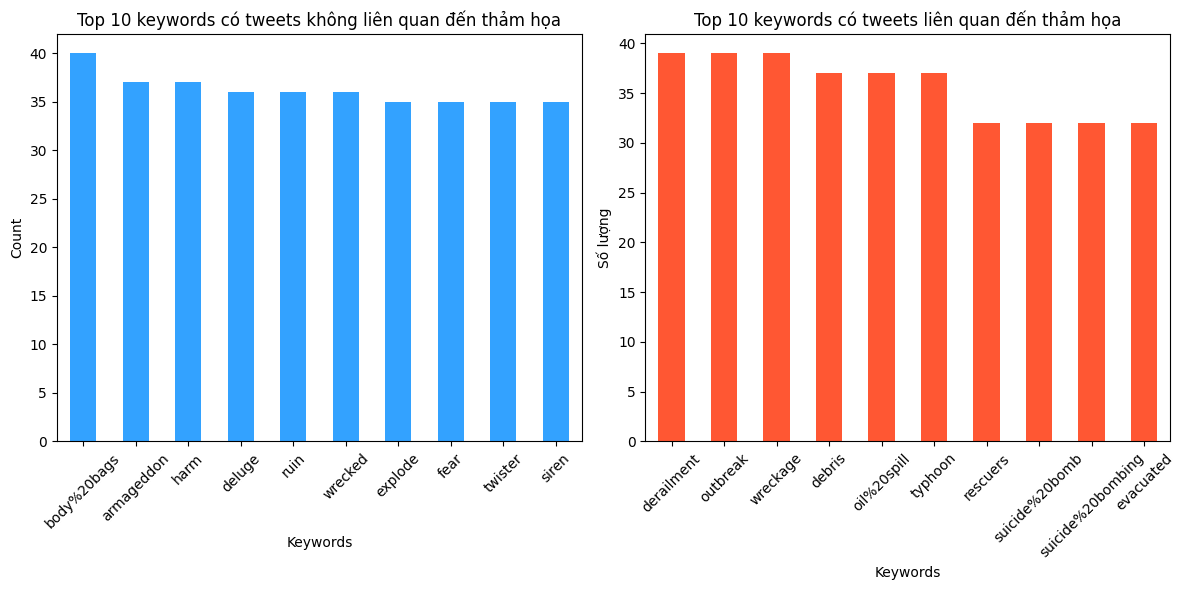

In [48]:
def get_top_keywords(df, target_value, n=10):
    filtered_df = df[df['target'] == target_value]

    keyword_counts = filtered_df['keyword'].value_counts()

    top_keywords = keyword_counts.head(n)
    return top_keywords

top_keywords_0 = get_top_keywords(data, 0)
top_keywords_1 = get_top_keywords(data, 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_keywords_0.plot(kind='bar', ax=axes[0], color='#33A2FF')
axes[0].set_title('Top 10 keywords có tweets không liên quan đến thảm họa')
axes[0].set_xlabel('Keywords')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_keywords_0.index, rotation=45)

top_keywords_1.plot(kind='bar', ax=axes[1], color='#FF5733')
axes[1].set_title('Top 10 keywords có tweets liên quan đến thảm họa')
axes[1].set_xlabel('Keywords')
axes[1].set_ylabel('Số lượng')
axes[1].set_xticklabels(top_keywords_1.index, rotation=45)

plt.tight_layout()
plt.show()

Number of rows with keywords in text: 3921
Number of rows without keywords in text: 3692


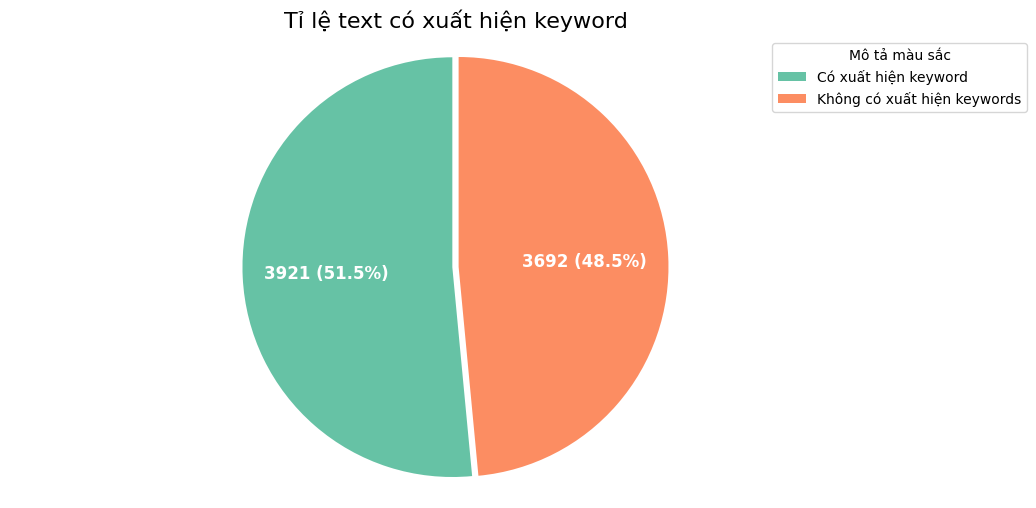

In [63]:
import re

data['keyword_exists'] = data.apply(
    lambda row: bool(
        re.search(r'\b' + re.escape(str(row['keyword'])) + r'\b', str(row['text'])))
    if pd.notna(row['keyword']) and pd.notna(row['text']) else False, axis=1
)
# Count rows with keywords in text
count_with_keywords = data['keyword_exists'].sum()

# Count rows without keywords in text
count_without_keywords = (~data['keyword_exists']).sum()

# Print the results
print(f"Number of rows with keywords in text: {count_with_keywords}")
print(f"Number of rows without keywords in text: {count_without_keywords}")

# Prepare data for the pie chart
labels = ['Có xuất hiện keyword', 'Không có xuất hiện keywords']
sizes = [count_with_keywords, count_without_keywords]
colors = ['#66c2a5', '#fc8d62']
explode = (0.03, 0)  # explode the first slice

# Create a custom function to format the percentage and count


def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f"{absolute} ({pct:.1f}%)"


# Create pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct=lambda pct: func(pct, sizes),
    startangle=90,
    textprops=dict(color="w")
)

# Beautify the plot
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=14)
plt.title('Tỉ lệ text có xuất hiện keyword', fontsize=16)

# Create legend for color descriptions
color_descriptions = [
    'Có xuất hiện keyword', 'Không có xuất hiện keywords']
plt.legend(color_descriptions, title="Mô tả màu sắc",
           loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [65]:
filtered_data = data[data['keyword_exists']]

filtered_data.head()

,id,keyword,location,text,target,keyword_exists
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,True
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,True
